## 使用 CNN 识别 MNIST 手写数字

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# 数据预处理
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = np.expand_dims(train_images, -1)
x_train = x_train / 255.0
x_test = np.expand_dims(test_images, -1)
x_test = x_test / 255.0

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [3]:
# 查看数据
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


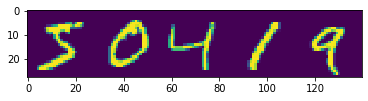

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
images = np.rollaxis(x_train[:5, :, :, 0], 1).reshape((28, -1))
plt.imshow(images)
plt.show()
print(y_train[:5])

In [5]:
# 构建模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dens

In [6]:
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
# 训练模型
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=3),
    keras.callbacks.ModelCheckpoint(filepath='./trained_models/mnist_cnn_weights.h5', monitor='val_loss', save_best_only=True),
]
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.15, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 10s 202us/step - loss: 0.3096 - acc: 0.9036 - val_loss: 0.0657 - val_acc: 0.9810
Epoch 2/20
51000/51000 [==============================] - 7s 129us/step - loss: 0.0616 - acc: 0.9805 - val_loss: 0.0865 - val_acc: 0.9714
Epoch 3/20
51000/51000 [==============================] - 7s 129us/step - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0456 - val_acc: 0.9869
Epoch 4/20
51000/51000 [==============================] - 7s 129us/step - loss: 0.0278 - acc: 0.9916 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 5/20
51000/51000 [==============================] - 7s 130us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0379 - val_acc: 0.9898
Epoch 6/20
51000/51000 [==============================] - 7s 129us/step - loss: 0.0163 - acc: 0.9953 - val_loss: 0.0582 - val_acc: 0.9841
Epoch 7/20
51000/51000 [==============================] - 7s 130us/step - 

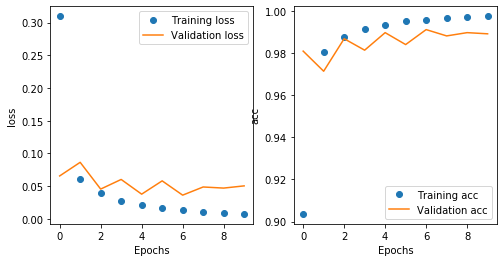

In [8]:
# 绘制训练过程
from util import plot_history

plot_history(history)

In [9]:
# 测试模型
loss, accuracy = model.evaluate(x_test, y_test)
print('test loss: {}, test accuracy: {}'.format(loss, accuracy))

10000/10000 [==============================] - 1s 106us/step
test loss: 0.034943732182651226, test accuracy: 0.9911


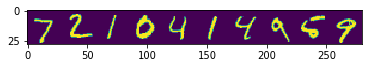

[7 2 1 0 4 1 4 9 5 9]


In [10]:
# 模型实践
images = np.rollaxis(x_test[:10, :, :, 0], 1).reshape((28, -1))
plt.imshow(images)
plt.show()
predicted = model.predict(x_test[:10]).argmax(axis=1)
print(predicted)